In [2]:
import pandas as pd
import os
import time
import patoolib
import gzip
import shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [136]:
patoolib.extract_archive(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz", 
                         outdir=r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\")

patool: Extracting L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz ...
patool: running "C:\Program Files\7-Zip\7z.EXE" e -oL:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\\ -- L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl.gz


PatoolError: Command `['C:\\Program Files\\7-Zip\\7z.EXE', 'e', '-oL:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\\\', '--', 'L:\\Raw_1_sec_Bar_Data\\FX\\EURUSD\\Pickle\\EURUSD.pkl.gz']' returned non-zero exit status 255

In [146]:
df = pd.read_pickle(r"L:\Raw_1_sec_Bar_Data\FX\EURUSD\Pickle\EURUSD.pkl")
analyzed_df = df["2018-02"]

### Inspecting one day

In [147]:
analyzed_df["2018-02-23 09:06:58":"2018-02-23 09:07:02"]

,Open,High,Low,Close,Trading_date_Date,Trading_date_Actual_Time,Trading_date_Actual_DateTime,Trading_date_Sequential_Time,Trading_date_Sequential_DateTime,Trading_date_Sequential_#_Secs
DateTime_UTC,,,,,,,,,,
2018-02-23 09:06:58,1.231575,1.231575,1.231575,1.231575,NaN,09:06:58,nan,10:51:58,nan,39119
2018-02-23 09:06:59,1.231575,1.231575,1.231525,1.231525,NaN,09:06:59,nan,10:51:59,nan,39120
2018-02-23 09:07:00,1.231525,1.231575,1.231525,1.231575,NaN,09:07:00,nan,10:52:00,nan,39121
2018-02-23 09:07:01,1.231575,1.231575,1.231525,1.231525,NaN,09:07:01,nan,10:52:01,nan,39122
2018-02-23 09:07:02,1.231525,1.231575,1.231525,1.231575,NaN,09:07:02,nan,10:52:02,nan,39123


In [148]:
df["Trading_date_Actual_DateTime"].value_counts()

nan     15897600
Name: Trading_date_Actual_DateTime, dtype: int64

## Selecting Date and Size

In [316]:
class Trade_Size:
    size = 20000
    
trading_date = "2018-05"

start_date = "2018-02-20"
end_date = "2018-02-28"

analyzed_df = df[trading_date]
# analyzed_df = df.loc[start_date:end_date,:]
analyzed_df.head()

,Open,High,Low,Close,Trading_date_Date,Trading_date_Actual_Time,Trading_date_Actual_DateTime,Trading_date_Sequential_Time,Trading_date_Sequential_DateTime,Trading_date_Sequential_#_Secs
DateTime_UTC,,,,,,,,,,
2018-05-01 00:00:00,1.208175,1.208200,1.208100,1.208100,NaN,00:00:00,nan,02:45:00,nan,9901
2018-05-01 00:00:01,1.208100,1.208100,1.208100,1.208100,NaN,00:00:01,nan,02:45:01,nan,9902
2018-05-01 00:00:02,1.208100,1.208100,1.208050,1.208050,NaN,00:00:02,nan,02:45:02,nan,9903
2018-05-01 00:00:03,1.208050,1.208050,1.208025,1.208025,NaN,00:00:03,nan,02:45:03,nan,9904
2018-05-01 00:00:04,1.208025,1.208025,1.208025,1.208025,NaN,00:00:04,nan,02:45:04,nan,9905


In [317]:
analyzed_df.resample("T").last().shape

(44640, 10)

### Resampling into 1 Minute bars

In [318]:
min_1_low = analyzed_df.loc[:,"Low"].resample("T").apply(np.min)
min_1_high = analyzed_df.loc[:,"High"].resample("T").apply(np.max)
min_1_open = analyzed_df.loc[:,"Open"].resample("T").first()
min_1_close = analyzed_df.loc[:,"Close"].resample("T").last()
min_1_Trading_date_Actual_Time = analyzed_df.loc[:,"Trading_date_Actual_Time"].resample("T").first()
min_1_Trading_date_Sequential_Time = analyzed_df.loc[:,"Trading_date_Sequential_Time"].resample("T").first()

min_1_analyzed_df = pd.DataFrame.from_dict({"Open":min_1_open,"High":min_1_high,"Low":min_1_low,"Close":min_1_close,
                                        "Trading_date_Actual_Time":min_1_Trading_date_Actual_Time,
                                        "Trading_date_Sequential_Time":min_1_Trading_date_Sequential_Time})

min_1_analyzed_df.head()

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time
DateTime_UTC,,,,,,
2018-05-01 00:00:00,1.208175,1.208200,1.207900,1.20790,00:00:00,02:45:00
2018-05-01 00:01:00,1.207900,1.207925,1.207850,1.20785,00:01:00,02:46:00
2018-05-01 00:02:00,1.207850,1.207925,1.207675,1.20775,00:02:00,02:47:00
2018-05-01 00:03:00,1.207750,1.207900,1.207750,1.20785,00:03:00,02:48:00
2018-05-01 00:04:00,1.207850,1.207925,1.207850,1.20790,00:04:00,02:49:00


### Calculate factors

In [319]:
min_1_analyzed_df["SMA10"] = min_1_analyzed_df["Close"].rolling(45).mean()
min_1_analyzed_df["SMA20"] = min_1_analyzed_df["Close"].rolling(105).mean()
min_1_analyzed_df["Close_vs_SMA20"] = min_1_analyzed_df["SMA20"] - min_1_analyzed_df["Close"]
min_1_analyzed_df["SMA10_vs_SMA20"] = min_1_analyzed_df["SMA10"] - min_1_analyzed_df["SMA20"]
min_1_analyzed_df["SMA10_vs_SMA20_Shifted"] = min_1_analyzed_df["SMA10_vs_SMA20"].shift(1)
min_1_analyzed_df.head()

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,SMA10,SMA20,Close_vs_SMA20,SMA10_vs_SMA20,SMA10_vs_SMA20_Shifted
DateTime_UTC,,,,,,,,,,,
2018-05-01 00:00:00,1.208175,1.208200,1.207900,1.20790,00:00:00,02:45:00,NaN,NaN,NaN,NaN,NaN
2018-05-01 00:01:00,1.207900,1.207925,1.207850,1.20785,00:01:00,02:46:00,NaN,NaN,NaN,NaN,NaN
2018-05-01 00:02:00,1.207850,1.207925,1.207675,1.20775,00:02:00,02:47:00,NaN,NaN,NaN,NaN,NaN
2018-05-01 00:03:00,1.207750,1.207900,1.207750,1.20785,00:03:00,02:48:00,NaN,NaN,NaN,NaN,NaN
2018-05-01 00:04:00,1.207850,1.207925,1.207850,1.20790,00:04:00,02:49:00,NaN,NaN,NaN,NaN,NaN


In [320]:
min_1_analyzed_df.dropna(inplace=True)
min_1_analyzed_df.head(35)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,SMA10,SMA20,Close_vs_SMA20,SMA10_vs_SMA20,SMA10_vs_SMA20_Shifted
DateTime_UTC,,,,,,,,,,,
2018-05-01 01:45:00,1.207550,1.207625,1.207500,1.207500,01:45:00,04:30:00,1.207571,1.207845,0.000345,-0.000274,-0.000268
2018-05-01 01:46:00,1.207500,1.207525,1.207450,1.207475,01:46:00,04:31:00,1.207563,1.207842,0.000367,-0.000279,-0.000274
2018-05-01 01:47:00,1.207475,1.207500,1.207450,1.207500,01:47:00,04:32:00,1.207554,1.207839,0.000339,-0.000285,-0.000279
2018-05-01 01:48:00,1.207500,1.207550,1.207475,1.207475,01:48:00,04:33:00,1.207547,1.207836,0.000361,-0.000289,-0.000285
2018-05-01 01:49:00,1.207475,1.207525,1.207450,1.207450,01:49:00,04:34:00,1.207538,1.207831,0.000381,-0.000293,-0.000289
2018-05-01 01:50:00,1.207450,1.207450,1.207400,1.207400,01:50:00,04:35:00,1.207530,1.207827,0.000427,-0.000297,-0.000293
2018-05-01 01:51:00,1.207400,1.207400,1.207375,1.207400,01:51:00,04:36:00,1.207521,1.207822,0.000422,-0.000301,-0.000297
2018-05-01 01:52:00,1.207400,1.207500,1.207400,1.207450,01:52:00,04:37:00,1.207513,1.207818,0.000368,-0.000305,-0.000301
2018-05-01 01:53:00,1.207450,1.207475,1.207450,1.207450,01:53:00,04:38:00,1.207503,1.207814,0.000364,-0.000310,-0.000305


### Filter for different times of the day

In [321]:
min_1_analyzed_df.shape

(30255, 11)

# Testing factor

## Calculating Factor's Values

In [322]:
class po:    
    
    is_position_open = False

    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False

def enter_factor(row):
    if (row.SMA10_vs_SMA20 < 0) & (row.Close_vs_SMA20 > 0) & (row.SMA10_vs_SMA20_Shifted >= 0) & (po.is_position_open == False):
        entry = True
    else:
        entry = False
    return entry

def take_profit(row):
    if (row.Close_vs_SMA20 < 0) & (po.is_position_open == True):
        take_prft = True
    else:
        take_prft = False
    return take_prft

# def stop_loss(row):
#     if (row.Close_vs_SMA20 < 0) & (po.is_position_open == True):
#         stop_lss = True
#     else:
#         stop_lss = False
#     return stop_lss

def action_func(row):

    #rtn = str(po.is_position_open)
    
    # Enter position
    if enter_factor(row):
        po.position_opened(opened=True)
        #rtn = rtn + "_" + str(po.is_position_open)
        return "Entered" #+ "_" + rtn
        #print("3")
        
    # Check if exit criteria has been met
    elif take_profit(row):
        po.position_opened(opened=False)
        #rtn = rtn + "_" + str(po.is_position_open)
        return "Took Profit" #+ "_" + rtn
    
    # Check if exit criteria has been met
#     elif stop_loss(row):
#         po.position_opened(opened=False)
#         return "Stopped Out"
        
    else:
        #rtn = "else" 
        return "Waiting" #+ "_" + rtn 

min_1_analyzed_df["Action"] = min_1_analyzed_df.apply(action_func, axis=1)

min_1_analyzed_df.head(50)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,SMA10,SMA20,Close_vs_SMA20,SMA10_vs_SMA20,SMA10_vs_SMA20_Shifted,Action
DateTime_UTC,,,,,,,,,,,,
2018-05-01 01:45:00,1.207550,1.207625,1.207500,1.207500,01:45:00,04:30:00,1.207571,1.207845,0.000345,-0.000274,-0.000268,Waiting
2018-05-01 01:46:00,1.207500,1.207525,1.207450,1.207475,01:46:00,04:31:00,1.207563,1.207842,0.000367,-0.000279,-0.000274,Waiting
2018-05-01 01:47:00,1.207475,1.207500,1.207450,1.207500,01:47:00,04:32:00,1.207554,1.207839,0.000339,-0.000285,-0.000279,Waiting
2018-05-01 01:48:00,1.207500,1.207550,1.207475,1.207475,01:48:00,04:33:00,1.207547,1.207836,0.000361,-0.000289,-0.000285,Waiting
2018-05-01 01:49:00,1.207475,1.207525,1.207450,1.207450,01:49:00,04:34:00,1.207538,1.207831,0.000381,-0.000293,-0.000289,Waiting
2018-05-01 01:50:00,1.207450,1.207450,1.207400,1.207400,01:50:00,04:35:00,1.207530,1.207827,0.000427,-0.000297,-0.000293,Waiting
2018-05-01 01:51:00,1.207400,1.207400,1.207375,1.207400,01:51:00,04:36:00,1.207521,1.207822,0.000422,-0.000301,-0.000297,Waiting
2018-05-01 01:52:00,1.207400,1.207500,1.207400,1.207450,01:52:00,04:37:00,1.207513,1.207818,0.000368,-0.000305,-0.000301,Waiting
2018-05-01 01:53:00,1.207450,1.207475,1.207450,1.207450,01:53:00,04:38:00,1.207503,1.207814,0.000364,-0.000310,-0.000305,Waiting


## Plotting Prices and Factor's values

c:\python 3.7\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
c:\python 3.7\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


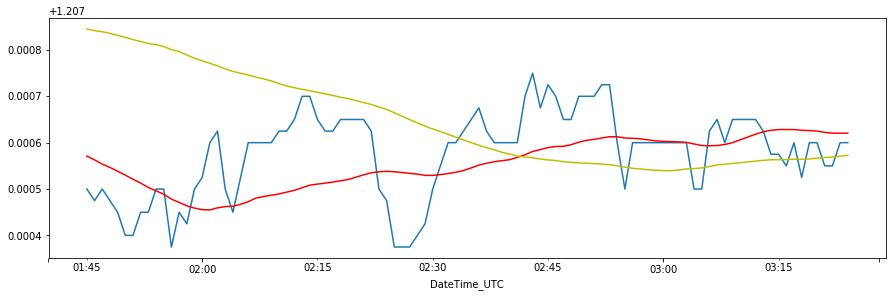

In [323]:
#%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot(3,1,1)
min_1_analyzed_df["Close"].head(100).plot(ax=ax1)
ax2 = plt.subplot(3,1,1)
min_1_analyzed_df["SMA10"].head(100).plot(ax=ax1, color="r")
ax3 = plt.subplot(3,1,1)
min_1_analyzed_df["SMA20"].head(100).plot(ax=ax1, color="y")
plt.show()

## Calculating Factor's Profit and Loss

In [324]:
class Pos_Open:
    is_position_open = False
    @classmethod
    def position_opened(cls, opened):
        if opened == True:
            cls.is_position_open = True
        else:
            cls.is_position_open = False
        
class Prft_lss_calc:
    entry_value = 0
    exit_value = 0
    prft_lss = 0
    
    def round_down(self, n):
        return (np.floor(n*100))/100
        
    @classmethod
    def add_to_pos(cls, price):
        cls.entry_value = price*Trade_Size.size
#     def close_pos(cls, price):
#         cls.current_position += -price*Trade_Size.size
    def prft_lss_cal(self, price):
        self.exit_value = -price*Trade_Size.size
        self.prft_lss = self.round_down(Prft_lss_calc.entry_value + self.exit_value)
        
        return self.prft_lss
        
def trd_price_and_prft(row):
    
    p_l_calc = Prft_lss_calc()
    
    if (row.Action == "Entered") & (Pos_Open.is_position_open == False):
        p_l_calc.add_to_pos(row.Low)
        Pos_Open.position_opened(True)
        return [row.Low,0]
    
    elif (row.Action == "Took Profit") & (Pos_Open.is_position_open == True):
#         Prft_lss_calc.close_pos(row.High)
        Pos_Open.position_opened(False)
        
        return [row.High,p_l_calc.prft_lss_cal(row.High)]
    
    else:
        return[np.NaN,0]

min_1_analyzed_df["Trade_Prc_and_Prft"] = min_1_analyzed_df.apply(trd_price_and_prft, axis=1)
min_1_analyzed_df["Trade_Prft_Lss"] = min_1_analyzed_df["Trade_Prc_and_Prft"].apply(lambda x: x[1])
min_1_analyzed_df.head(80)

,Open,High,Low,Close,Trading_date_Actual_Time,Trading_date_Sequential_Time,SMA10,SMA20,Close_vs_SMA20,SMA10_vs_SMA20,SMA10_vs_SMA20_Shifted,Action,Trade_Prc_and_Prft,Trade_Prft_Lss
DateTime_UTC,,,,,,,,,,,,,,
2018-05-01 01:45:00,1.207550,1.207625,1.207500,1.207500,01:45:00,04:30:00,1.207571,1.207845,0.000345,-0.000274,-0.000268,Waiting,"[nan, 0]",0.0
2018-05-01 01:46:00,1.207500,1.207525,1.207450,1.207475,01:46:00,04:31:00,1.207563,1.207842,0.000367,-0.000279,-0.000274,Waiting,"[nan, 0]",0.0
2018-05-01 01:47:00,1.207475,1.207500,1.207450,1.207500,01:47:00,04:32:00,1.207554,1.207839,0.000339,-0.000285,-0.000279,Waiting,"[nan, 0]",0.0
2018-05-01 01:48:00,1.207500,1.207550,1.207475,1.207475,01:48:00,04:33:00,1.207547,1.207836,0.000361,-0.000289,-0.000285,Waiting,"[nan, 0]",0.0
2018-05-01 01:49:00,1.207475,1.207525,1.207450,1.207450,01:49:00,04:34:00,1.207538,1.207831,0.000381,-0.000293,-0.000289,Waiting,"[nan, 0]",0.0
2018-05-01 01:50:00,1.207450,1.207450,1.207400,1.207400,01:50:00,04:35:00,1.207530,1.207827,0.000427,-0.000297,-0.000293,Waiting,"[nan, 0]",0.0
2018-05-01 01:51:00,1.207400,1.207400,1.207375,1.207400,01:51:00,04:36:00,1.207521,1.207822,0.000422,-0.000301,-0.000297,Waiting,"[nan, 0]",0.0
2018-05-01 01:52:00,1.207400,1.207500,1.207400,1.207450,01:52:00,04:37:00,1.207513,1.207818,0.000368,-0.000305,-0.000301,Waiting,"[nan, 0]",0.0
2018-05-01 01:53:00,1.207450,1.207475,1.207450,1.207450,01:53:00,04:38:00,1.207503,1.207814,0.000364,-0.000310,-0.000305,Waiting,"[nan, 0]",0.0


## Result (P & L)

Gross P&L: -141.21999999999997 (-4.7874%)
Commission: 286
Slippage: 286.0
Net P&L: -713.22 (-3.5660999999999996%)


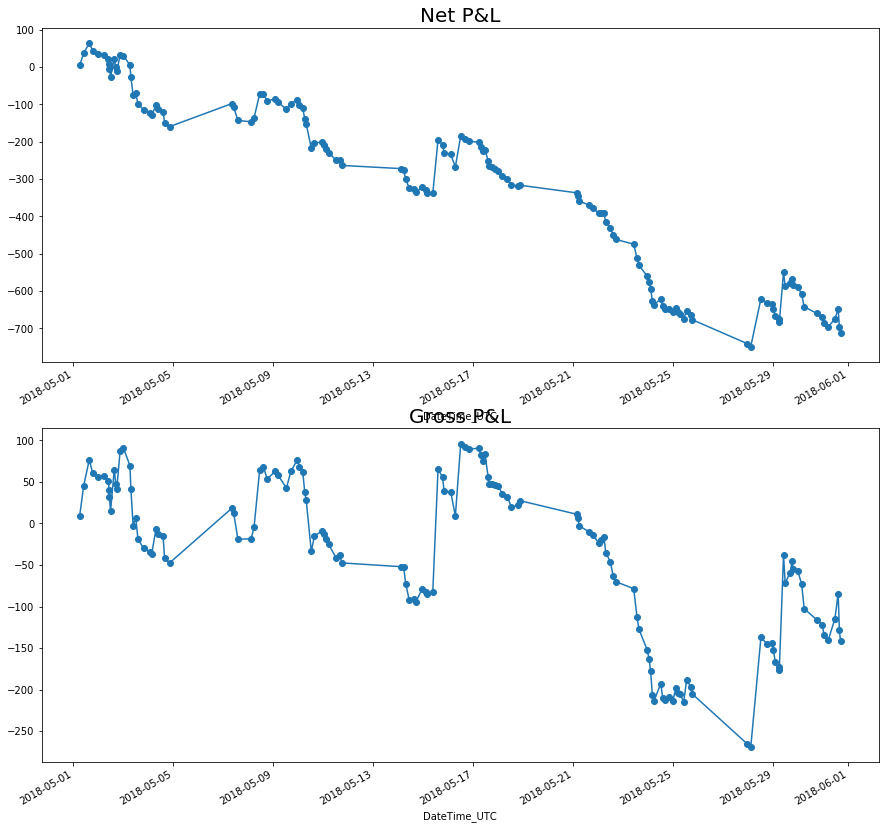

In [325]:
# Gross P&L:
gross_absolute_profit_loss = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].sum()
gross_percent_profit_loss = (absolute_profit_loss/Trade_Size.size)*100

# Commission:
commission = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*2

#Slippage:
slippage = min_1_analyzed_df.loc[min_1_analyzed_df["Trade_Prft_Lss"] != 0.0,"Trade_Prft_Lss"].count()*(Trade_Size.size/10000)

# Net P&L:
net_absolute_profit_loss = gross_absolute_profit_loss - commission - slippage
net_percent_profit_loss = (net_absolute_profit_loss/Trade_Size.size)*100

print("Gross P&L: {} ({}%)".format(gross_absolute_profit_loss,gross_percent_profit_loss))
print("Commission: {}".format(commission))
print("Slippage: {}".format(slippage))
print("Net P&L: {} ({}%)".format(net_absolute_profit_loss,net_percent_profit_loss))

# Charting P&L:
pnl_chart_df = min_1_analyzed_df["Trade_Prft_Lss"].replace(0,np.NaN)
pnl_chart_df_cumsum = pnl_chart_df[pnl_chart_df < 1000000000].cumsum()
pnl_chart_df_less_comm_and_slip = pnl_chart_df - 2 - Trade_Size.size/10000
pnl_chart_df_less_comm_and_slip_cumsum = pnl_chart_df_less_comm_and_slip[pnl_chart_df_less_comm_and_slip < 1000000000].cumsum()

fig1 = plt.figure(figsize=(15,15))
ax4 = plt.subplot(2,1,1)
ax4.set_title("Net P&L", fontsize=20)
pnl_chart_df_less_comm_and_slip_cumsum.plot(ax=ax4, linestyle="-", marker="o")
ax5 = plt.subplot(2,1,2)
ax5.set_title("Gross P&L", fontsize=20)
pnl_chart_df_cumsum.plot(ax=ax5, linestyle="-", marker="o")
plt.show()
# ax2 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA10"].head(100).plot(ax=ax1, color="r")
# ax3 = plt.subplot(3,1,1)
# min_1_analyzed_df["SMA20"].head(100).plot(ax=ax1, color="y")